In [9]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [10]:
File_Names = ['a3_b3_g2.1_e2_1.0_1', 'a3_b3_g2.1_e2_1.0_2', 'a3_b3_g2.1_e2_1.0_3', 'a3_b3_g2.1_e2_1.0_4', 'a3_b3_g2.1_e2_1.0_5', 'a3_b3_g2.1_e2_1.0_6', 'a3_b3_g2.1_e2_1.0_7', 'a3_b3_g2.1_e2_1.0_8', 'a3_b3_g2.1_e2_1.0_9', 'a3_b3_g2.1_e2_1.0_10', 'a3_b3_g2.1_e2_1.0_11', 'a3_b3_g2.1_e2_1.0_12', 'a3_b3_g2.1_e2_1.0_13', 'a3_b3_g2.1_e2_1.0_14', 'a3_b3_g2.1_e2_1.0_15']

g = globals()
N = 1000 # Number of nodes

files = len(File_Names)

for i in range(files):
    g[f"data{i+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i]}.csv', delimiter=',')

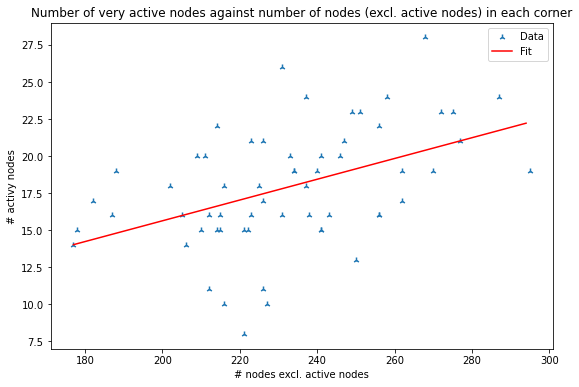

In [28]:
### Looking for correlation between number of extremely active nodes and number of nodes in each polarization corner

# Splitting each dataset into 4:

for i in range(files):
    ord = np.zeros(N)
    for j in range(N):

        iter = 10
        # Aggregate opinion over last iter iterations to reduce influence of fluctuations
        # This assumes numerical stability over last iterations!
        op1 = 0
        op2 = 0
        for k in range(iter):
            op1 += g[f"data{i+1}"][len(g[f"data{i+1}"])-2-2*k][j]
            op2 += g[f"data{i+1}"][len(g[f"data{i+1}"])-1-2*k][j]
        op1 = op1/iter
        op2 = op2/iter
        
        # ord saves quadrant of node in scatter plot (op1 x, op2 y), ord[i]==1 top right, ord[i]==2 top left and so on
        if op1 > 0:
            if op2 > 0:
                ord[j] = 1
            else: 
                ord[j] = 4
        else:
            if op2 > 0:
                ord[j] = 2
            else: 
                ord[j] = 3
                
    # Now creating 4 datasets saving the only node's activity in the dataset corresponding to its corner
    for j in range(4):
        g[f"data{i+1}_corn{j+1}"] = []

    for j in range(N):
        if ord[j] == 1:
            g[f"data{i+1}_corn1"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 2:
            g[f"data{i+1}_corn2"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 3:
            g[f"data{i+1}_corn3"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 4:
            g[f"data{i+1}_corn4"].append( g[f"data{i+1}"][0][j] )

# Going through the datasets and counting # of nodes with activity smaller and bigger than act_thresh
act_thresh = 0.1

# first column of count_arr # is number of nodes with activity below a_thresh
count_arr = np.zeros((files*4, 2))
for i in range(files):
    for j in range(4):
        for k in range( len(g[f"data{i+1}_corn{j+1}"]) ):
            act = g[f"data{i+1}_corn{j+1}"][k]
            if act < act_thresh: 
                count_arr[i*4+j][0] += 1
            if act >= act_thresh: 
                count_arr[i*4+j][1] += 1

# Plotting # of nodes with activity > act_thresh against # those with activity < act_thresh + Linear fit
# Fit data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = np.array(count_arr[:,0])
x = x.reshape(-1, 1)
y = np.array(count_arr[:,1])

lin_reg.fit(X=x, y=y)

"""
print("y-intercept:", lin_reg.intercept_)
print("slope:", lin_reg.coef_)
print("R²:", lin_reg.score(x, y))
"""

# Plot fit and data
def f(x):
    return lin_reg.intercept_ + x*lin_reg.coef_

min = np.min(x)
max = np.max(x)
arr = np.arange(min, max)

plt.figure(figsize=(9,6))
plt.scatter(count_arr[:,0], count_arr[:,1], label="Data", marker="2")
plt.plot(arr, f(arr), label="Fit", color="r")
plt.xlabel("# nodes excl. active nodes")
plt.ylabel("# activy nodes")
plt.title("Number of very active nodes against number of nodes (excl. active nodes) in each corner")
plt.legend()
plt.show()


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = np.array(count_arr[:,0])
x = x.reshape(-1, 1)
y = np.array(count_arr[:,1])

lin_reg.fit(X=x, y=y)

print("y-intercept:", lin_reg.intercept_)
print("slope:", lin_reg.coef_)
print("R²:", lin_reg.score(x, y))


y-intercept: 1.6255673931454773
slope: [0.07004136]
R²: 0.20716506677731195
